In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy.stats import pearsonr
import sklearn
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.deterministic import DeterministicProcess
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [443]:
df = pd.read_csv(r'C:\Users\uzair\Desktop\Project\GlobalTemperatures.csv', index_col=0, parse_dates=True)
df.head()

LandAverageTemperature  LandAverageTemperatureUncertainty  \
dt                                                                      
1750-01-01                   3.034                              3.574   
1750-02-01                   3.083                              3.702   
1750-03-01                   5.626                              3.076   
1750-04-01                   8.490                              2.451   
1750-05-01                  11.573                              2.072   

            LandMaxTemperature  LandMaxTemperatureUncertainty  \
dt                                                              
1750-01-01                 NaN                            NaN   
1750-02-01                 NaN                            NaN   
1750-03-01                 NaN                            NaN   
1750-04-01                 NaN                            NaN   
1750-05-01                 NaN                            NaN   

            LandMinTemperature  LandMinTemperatureUncertainty  \
dt                                                              
1750-01-01                 NaN                            NaN   
1750-02-01                 NaN                            NaN   
1750-03-01                 NaN                            NaN   
1750-04-01                 NaN                            NaN   
1750-05-01                 NaN                            NaN   

            LandAndOceanAverageTemperature  \
dt                                           
1750-01-01                             NaN   
1750-02-01                             NaN   
1750-03-01                             NaN   
1750-04-01                             NaN   
1750-05-01                             NaN   

            LandAndOceanAverageTemperatureUncertainty  
dt                                                     
1750-01-01                                        NaN  
1750-02-01                                        NaN  
1750-03-01                                        NaN  
1750-04-01                                        NaN  
1750-05-01                                        NaN

In [444]:
df.shape

(3192, 8)

In [445]:
df.dtypes

LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [446]:
df.isnull().sum()

LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [447]:
print('Min (past) date :', df.index.min())
print('Max (recent) date :', df.index.max())

Min (past) date : 1750-01-01 00:00:00
Max (recent) date : 2015-12-01 00:00:00


In [448]:
print('Number of distinct years :', len(df.index.year.unique()))
print('Number of distinct months :', len(df.index.month.unique()))

Number of distinct years : 266
Number of distinct months : 12


In [449]:
df.describe(include='all')

LandAverageTemperature  LandAverageTemperatureUncertainty  \
count             3180.000000                        3180.000000   
mean                 8.374731                           0.938468   
std                  4.381310                           1.096440   
min                 -2.080000                           0.034000   
25%                  4.312000                           0.186750   
50%                  8.610500                           0.392000   
75%                 12.548250                           1.419250   
max                 19.021000                           7.880000   

       LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
count         1992.000000                    1992.000000         1992.000000   
mean            14.350601                       0.479782            2.743595   
std              4.309579                       0.583203            4.155835   
min              5.900000                       0.044000           -5.407000   
25%             10.212000                       0.142000           -1.334500   
50%             14.760000                       0.252000            2.949500   
75%             18.451500                       0.539000            6.778750   
max             21.320000                       4.373000            9.715000   

       LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
count                    1992.000000                     1992.000000   
mean                        0.431849                       15.212566   
std                         0.445838                        1.274093   
min                         0.045000                       12.475000   
25%                         0.155000                       14.047000   
50%                         0.279000                       15.251000   
75%                         0.458250                       16.396250   
max                         3.498000                       17.611000   

       LandAndOceanAverageTemperatureUncertainty  
count                                1992.000000  
mean                                    0.128532  
std                                     0.073587  
min                                     0.042000  
25%                                     0.063000  
50%                                     0.122000  
75%                                     0.151000  
max                                     0.457000

In [450]:
df.rename(columns={
    'LandAverageTemperature'                   :'land_avg_temp', 
    'LandAverageTemperatureUncertainty'        :'land_avg_temp_uncertain', 
    'LandMaxTemperature'                       :'land_max_temp',
    'LandMaxTemperatureUncertainty'            :'land_max_temp_uncertain', 
    'LandMinTemperature'                       :'land_min_temp', 
    'LandMinTemperatureUncertainty'            :'land_min_temp_uncertain', 
    'LandAndOceanAverageTemperature'           :'land_ocean_avg_temp', 
    'LandAndOceanAverageTemperatureUncertainty':'land_ocean_avg_temp_uncertain'
}, inplace=True)
df.head()

land_avg_temp  land_avg_temp_uncertain  land_max_temp  \
dt                                                                  
1750-01-01          3.034                    3.574            NaN   
1750-02-01          3.083                    3.702            NaN   
1750-03-01          5.626                    3.076            NaN   
1750-04-01          8.490                    2.451            NaN   
1750-05-01         11.573                    2.072            NaN   

            land_max_temp_uncertain  land_min_temp  land_min_temp_uncertain  \
dt                                                                            
1750-01-01                      NaN            NaN                      NaN   
1750-02-01                      NaN            NaN                      NaN   
1750-03-01                      NaN            NaN                      NaN   
1750-04-01                      NaN            NaN                      NaN   
1750-05-01                      NaN            NaN                      NaN   

            land_ocean_avg_temp  land_ocean_avg_temp_uncertain  
dt                                                              
1750-01-01                  NaN                            NaN  
1750-02-01                  NaN                            NaN  
1750-03-01                  NaN                            NaN  
1750-04-01                  NaN                            NaN  
1750-05-01                  NaN                            NaN

In [451]:
df[['land_avg_temp', 'land_avg_temp_uncertain']].loc[df.land_avg_temp.isnull()]

land_avg_temp  land_avg_temp_uncertain
dt                                                
1750-11-01            NaN                      NaN
1751-05-01            NaN                      NaN
1751-07-01            NaN                      NaN
1751-10-01            NaN                      NaN
1751-11-01            NaN                      NaN
1751-12-01            NaN                      NaN
1752-02-01            NaN                      NaN
1752-05-01            NaN                      NaN
1752-06-01            NaN                      NaN
1752-07-01            NaN                      NaN
1752-08-01            NaN                      NaN
1752-09-01            NaN                      NaN

In [452]:
df.isnull().sum()

land_avg_temp                      12
land_avg_temp_uncertain            12
land_max_temp                    1200
land_max_temp_uncertain          1200
land_min_temp                    1200
land_min_temp_uncertain          1200
land_ocean_avg_temp              1200
land_ocean_avg_temp_uncertain    1200
dtype: int64

In [453]:
max_same_max2 = list(df.loc[df['land_max_temp'].isna()].index) == list(df.loc[df['land_max_temp_uncertain'].isna()].index)
max_same_min = list(df.loc[df['land_max_temp'].isna()].index) == list(df.loc[df['land_min_temp'].isna()].index)
max_same_min2 = list(df.loc[df['land_max_temp'].isna()].index) == list(df.loc[df['land_min_temp_uncertain'].isna()].index)
max_same_loa = list(df.loc[df['land_max_temp'].isna()].index) == list(df.loc[df['land_ocean_avg_temp'].isna()].index)
max_same_loa2 = list(df.loc[df['land_max_temp'].isna()].index) == list(df.loc[df['land_ocean_avg_temp_uncertain'].isna()].index)

In [454]:
print(max_same_max2 and max_same_min and max_same_min2 and max_same_loa and max_same_loa2)

True


In [455]:
df.dropna(inplace=True)
print('Min (past) date :', df.index.min())
print('Max (recent) date :', df.index.max())

Min (past) date : 1850-01-01 00:00:00
Max (recent) date : 2015-12-01 00:00:00


In [456]:
df['years'] = df.index.year
df['month'] = df.index.month
df.head()

land_avg_temp  land_avg_temp_uncertain  land_max_temp  \
dt                                                                  
1850-01-01          0.749                    1.105          8.242   
1850-02-01          3.071                    1.275          9.970   
1850-03-01          4.954                    0.955         10.347   
1850-04-01          7.217                    0.665         12.934   
1850-05-01         10.004                    0.617         15.655   

            land_max_temp_uncertain  land_min_temp  land_min_temp_uncertain  \
dt                                                                            
1850-01-01                    1.738         -3.206                    2.822   
1850-02-01                    3.007         -2.291                    1.623   
1850-03-01                    2.401         -1.905                    1.410   
1850-04-01                    1.004          1.018                    1.329   
1850-05-01                    2.406          3.811                    1.347   

            land_ocean_avg_temp  land_ocean_avg_temp_uncertain  years  month  
dt                                                                            
1850-01-01               12.833                          0.367   1850      1  
1850-02-01               13.588                          0.414   1850      2  
1850-03-01               14.043                          0.341   1850      3  
1850-04-01               14.667                          0.267   1850      4  
1850-05-01               15.507                          0.249   1850      5

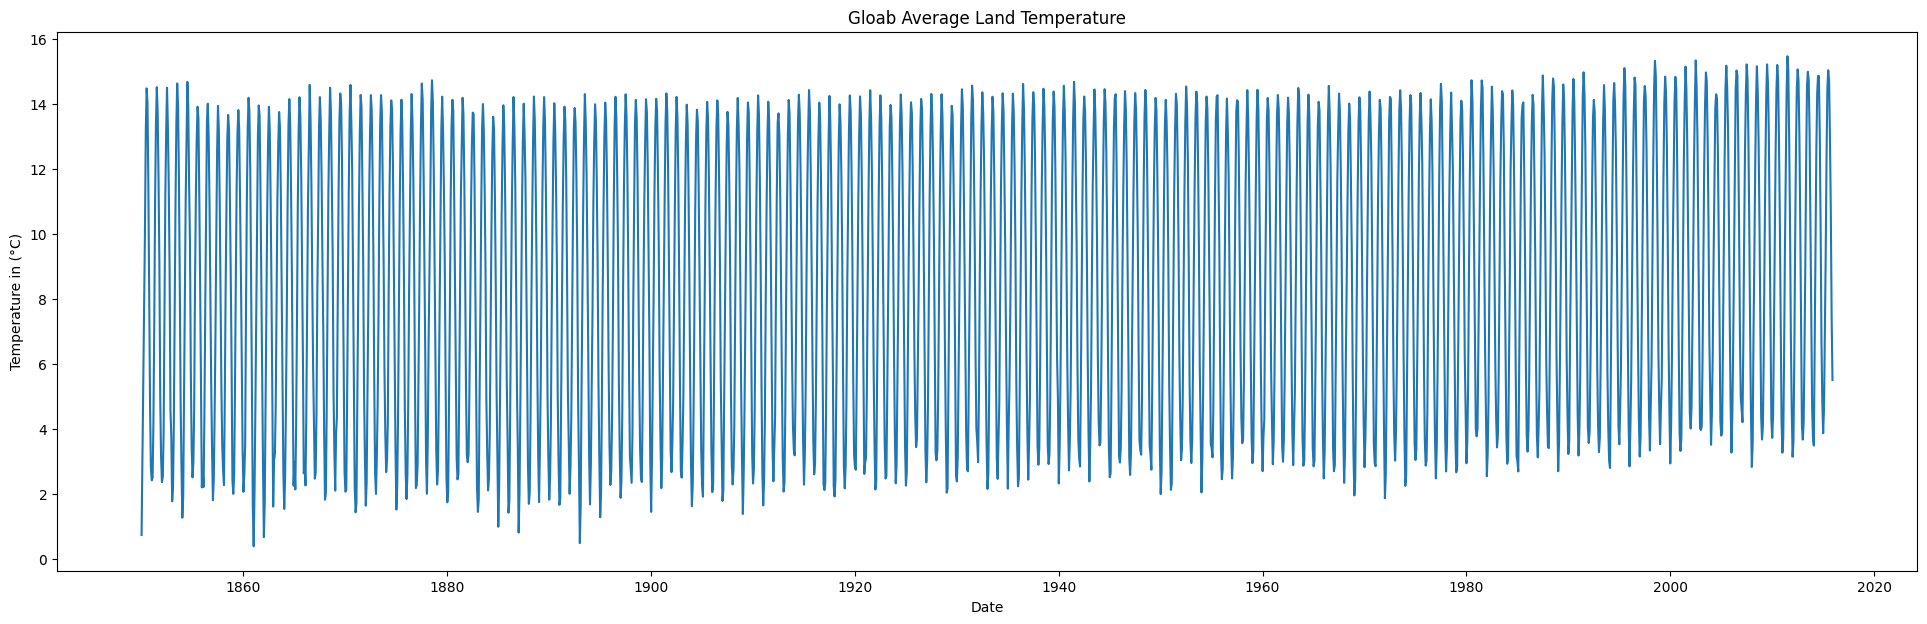

In [457]:
# Plot the line chart 
plt.figure(figsize=(24,7))

sns.lineplot(data=df['land_avg_temp'])
plt.xlabel('Date')
plt.ylabel('Temperature in (°C)')
plt.title('Gloab Average Land Temperature')
plt.show()

We see that the graph fluctuates drastically. However fluctuation is actually normal because it displays the periodic seasonal variation that occurs all the time.

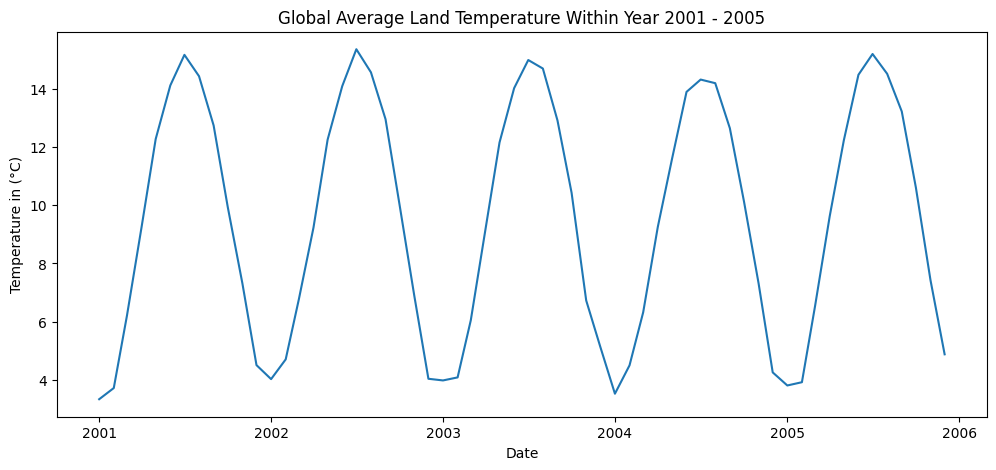

In [458]:
# We can observe this from a small fraction of the line chart, says, within a five-year period:
plt.figure(figsize=(12,5))

sns.lineplot(data=df['land_avg_temp'].loc[(df.index.year >= 2001) & (df.index.year <= 2005)])
plt.title('Global Average Land Temperature Within Year 2001 - 2005')
plt.xlabel('Date')
plt.ylabel('Temperature in (°C)')
plt.show()

In [459]:
#creating a pivot table to plot the monthly temperatures through the years

pivot = pd.pivot_table(data=df, values='land_avg_temp', index='month', columns='years', aggfunc='mean')
pivot

years    1850    1851    1852    1853    1854    1855    1856    1857    1858  \
month                                                                           
1       0.749   2.431   2.376   1.786   1.281   2.522   2.760   1.821   2.739   
2       3.071   2.508   2.540   2.228   1.941   2.982   2.226   2.481   2.284   
3       4.954   4.192   3.884   4.078   4.698   4.617   4.372   4.312   4.834   
4       7.217   7.287   7.487   7.541   7.622   8.580   7.751   6.827   8.250   
5      10.004  11.113  11.169  10.975  11.095  11.186  10.530   9.885  10.851   
6      13.150  13.418  13.164  13.410  12.829  12.984  13.496  12.611  12.956   
7      14.492  14.531  14.512  14.645  14.692  13.926  14.019  13.953  13.677   
8      14.039  13.751  13.304  13.953  13.889  13.547  13.021  13.203  13.220   
9      11.505  11.677  11.478  11.710  11.514  11.141  10.948  11.056  11.148   
10      8.091   9.122   8.910   8.535   9.763   8.444   8.087   8.198   8.810   
11      4.733   4.973   4.593   4.783   5.745   5.186   5.360   5.236   5.990   
12      2.803   3.140   3.785   2.858   3.457   2.214   3.381   3.515   2.444   

years    1859  ...    2006    2007    2008    2009    2010    2011    2012  \
month          ...                                                           
1       2.015  ...   3.286   4.579   2.844   3.687   3.737   3.282   3.157   
2       2.611  ...   4.430   4.221   3.576   4.094   4.399   3.743   3.628   
3       5.023  ...   6.329   6.485   6.906   6.086   6.738   6.101   6.023   
4       8.542  ...   9.055   9.823   9.295   9.367   9.671   9.483   9.676   
5      11.456  ...  11.786  12.518  12.054  12.112  12.406  11.986  12.590   
6      13.142  ...  14.443  14.309  14.145  14.201  14.421  14.370  14.492   
7      13.827  ...  15.042  15.230  15.174  15.231  15.213  15.482  15.076   
8      13.217  ...  14.913  14.752  14.377  14.655  14.768  15.012  14.720   
9      11.080  ...  12.875  12.930  12.802  13.153  12.863  12.912  13.040   
10      8.834  ...  10.289  10.332  10.399  10.136  10.442  10.352  10.428   
11      5.912  ...   6.955   7.084   7.224   7.031   7.487   6.814   7.156   
12      3.365  ...   4.987   4.523   4.385   4.310   4.292   4.655   4.102   

years    2013    2014    2015  
month                          
1       3.685   3.732   3.881  
2       4.222   3.500   4.664  
3       6.261   6.378   6.740  
4       9.044   9.589   9.313  
5      12.195  12.582  12.312  
6      14.568  14.335  14.505  
7      15.003  14.873  15.051  
8      14.742  14.875  14.755  
9      13.154  13.091  12.999  
10     10.256  10.330  10.801  
11      7.424   6.713   7.433  
12      4.724   4.850   5.518  

[12 rows x 166 columns]

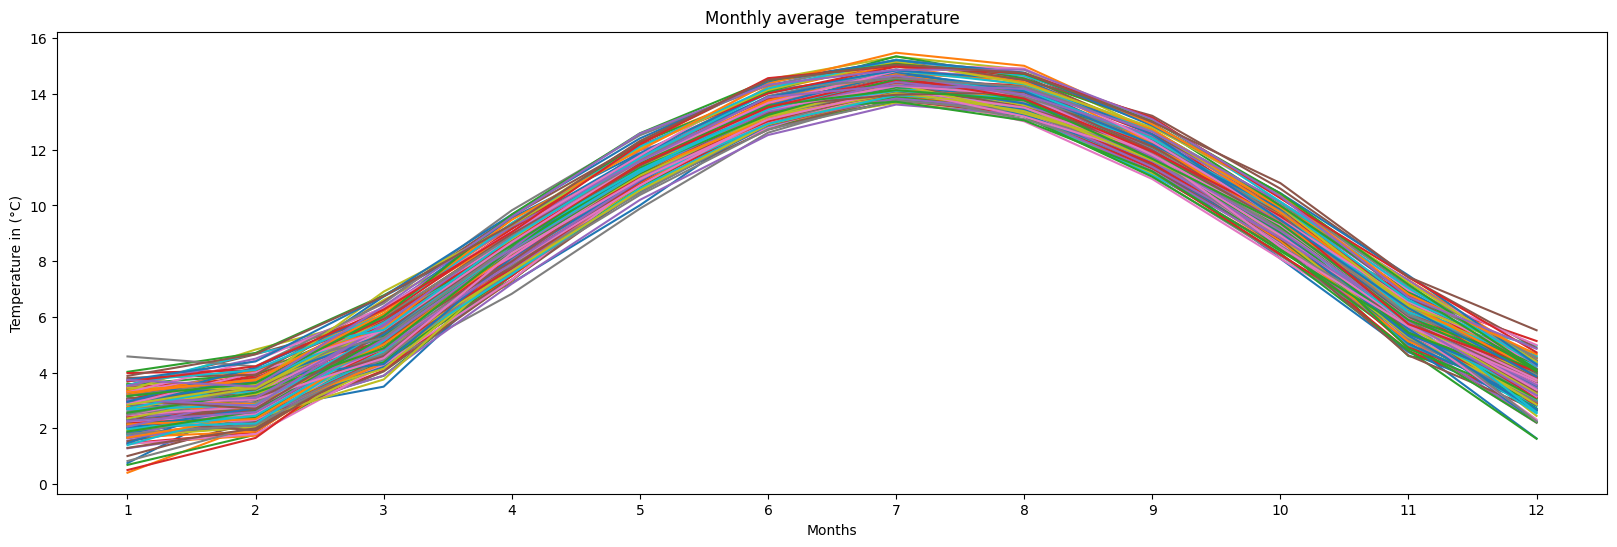

In [460]:
pivot.plot(figsize=(20,6))
plt.title('Monthly average  temperature')
plt.xlabel('Months')
plt.ylabel('Temperature in (°C)')
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.show()

In [461]:
pivot_years = pd.pivot_table(data=df, values='land_avg_temp', index='years', aggfunc='mean')
pivot_years

land_avg_temp
years               
1850        7.900667
1851        8.178583
1852        8.100167
1853        8.041833
1854        8.210500
...              ...
2011        9.516000
2012        9.507333
2013        9.606500
2014        9.570667
2015        9.831000

[166 rows x 1 columns]

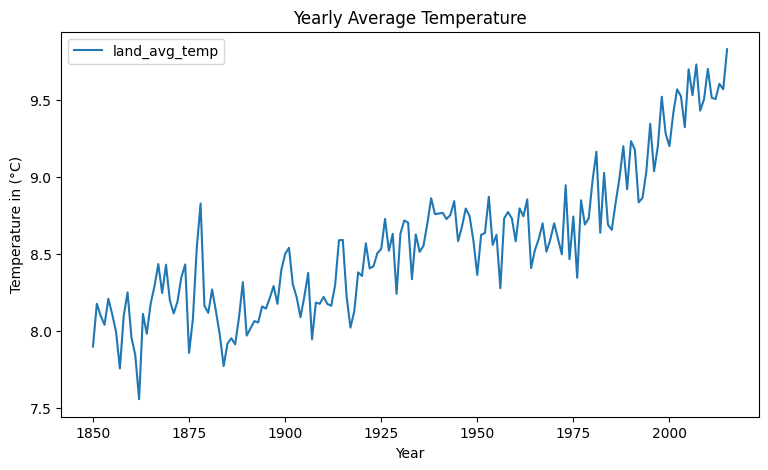

In [462]:
plt.figure(figsize=(9,5))

sns.lineplot(data=pivot_years)
plt.xlabel('Year')
plt.ylabel('Temperature in (°C)')
plt.title('Yearly Average Temperature')
plt.show()

The increment from roughly the year 1975 onwards is relatively faster/steeper -- the straight line that approximates
the growth has a higher slope. It reaches the highest point throughout the whole 1750 - 2015 period at precisely
the last year -- year 2015.
It seems to strongly suggest that global warming is indeed happening.

### Global Maximum Land Temperature

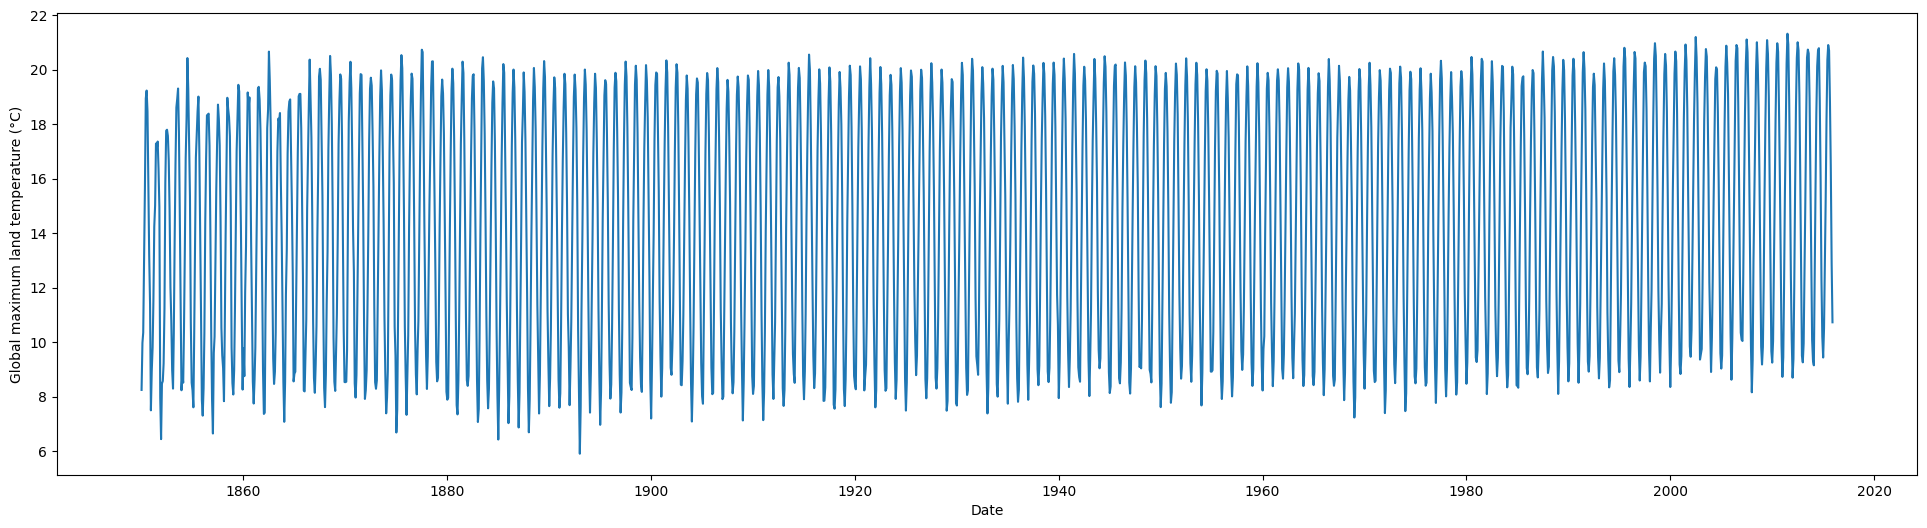

In [463]:
plt.figure(figsize=(24,6))

sns.lineplot(data=df['land_max_temp'])
plt.xlabel('Date')
plt.ylabel('Global maximum land temperature (°C)')
plt.show()

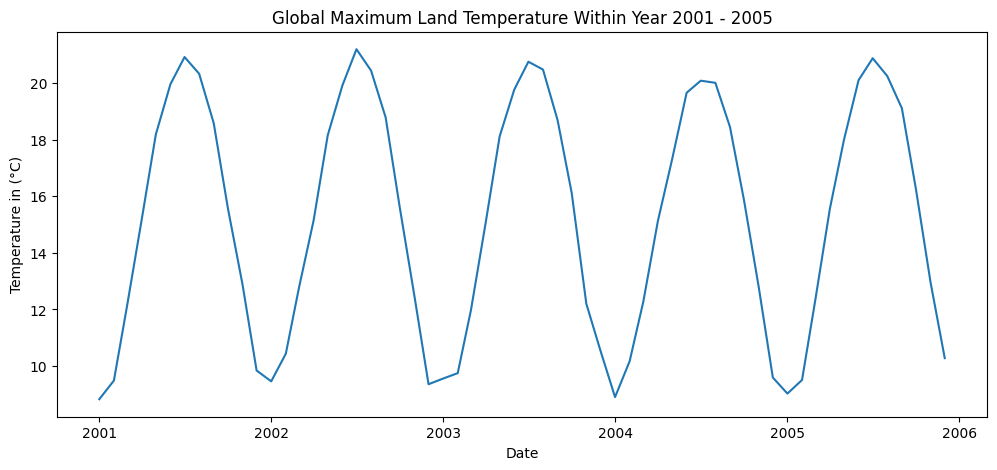

In [464]:
plt.figure(figsize=(12,5))

sns.lineplot(data=df['land_max_temp'].loc[(df.index.year >= 2001) & (df.index.year <= 2005)])
plt.title('Global Maximum Land Temperature Within Year 2001 - 2005')
plt.xlabel('Date')
plt.ylabel('Temperature in (°C)')
plt.show()

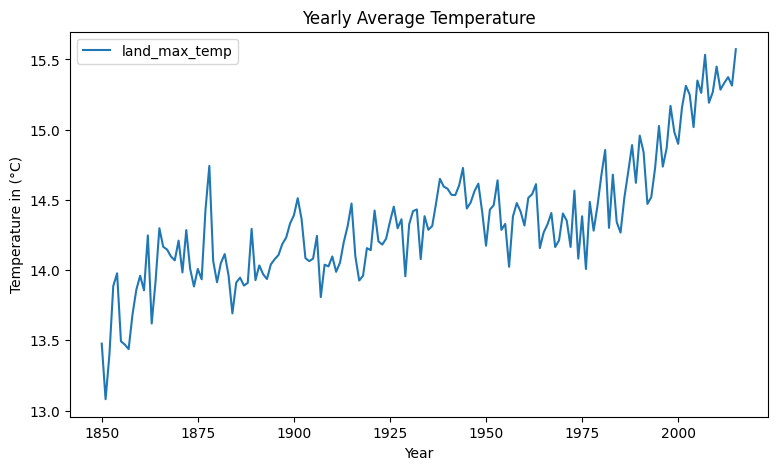

In [465]:
pivot_years_land_max = pd.pivot_table(data=df, values='land_max_temp', index='years', aggfunc='mean')
plt.figure(figsize=(9,5))

sns.lineplot(data=pivot_years_land_max)
plt.xlabel('Year')
plt.ylabel('Temperature in (°C)')
plt.title('Yearly Average Temperature')
plt.show()

Now we decompose the data

In [466]:
decomp= seasonal_decompose(df['land_avg_temp'])
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

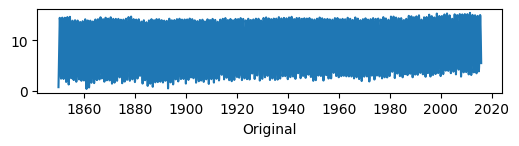

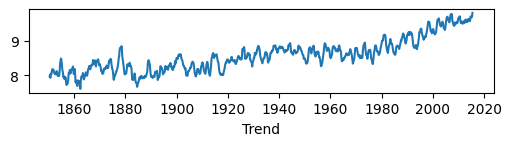

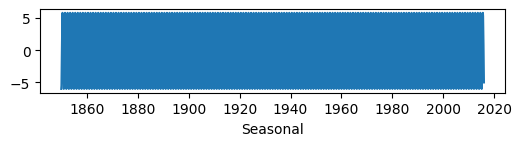

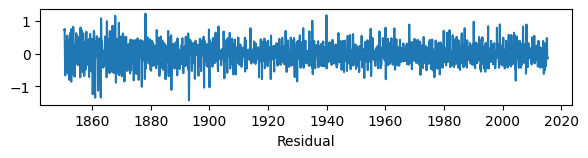

In [467]:
plt.figure(figsize=(6,5))
plt.subplot(411)
plt.plot(df['land_avg_temp'])
plt.xlabel('Original')

plt.figure(figsize=(6,5))
plt.subplot(412)
plt.plot(trend)
plt.xlabel('Trend')

plt.figure(figsize=(6,5))
plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('Seasonal')

plt.figure(figsize=(6,5))
plt.subplot(414)
plt.plot(residual)
plt.xlabel('Residual')

plt.tight_layout()
plt.show()

### Model Building

In [468]:
df = pd.read_csv(r'C:\Users\uzair\Desktop\Project\GlobalTemperatures.csv', parse_dates=['dt'], index_col='dt')
df['years'] = df.index.year
df['month'] = df.index.month
df.head()

LandAverageTemperature  LandAverageTemperatureUncertainty  \
dt                                                                      
1750-01-01                   3.034                              3.574   
1750-02-01                   3.083                              3.702   
1750-03-01                   5.626                              3.076   
1750-04-01                   8.490                              2.451   
1750-05-01                  11.573                              2.072   

            LandMaxTemperature  LandMaxTemperatureUncertainty  \
dt                                                              
1750-01-01                 NaN                            NaN   
1750-02-01                 NaN                            NaN   
1750-03-01                 NaN                            NaN   
1750-04-01                 NaN                            NaN   
1750-05-01                 NaN                            NaN   

            LandMinTemperature  LandMinTemperatureUncertainty  \
dt                                                              
1750-01-01                 NaN                            NaN   
1750-02-01                 NaN                            NaN   
1750-03-01                 NaN                            NaN   
1750-04-01                 NaN                            NaN   
1750-05-01                 NaN                            NaN   

            LandAndOceanAverageTemperature  \
dt                                           
1750-01-01                             NaN   
1750-02-01                             NaN   
1750-03-01                             NaN   
1750-04-01                             NaN   
1750-05-01                             NaN   

            LandAndOceanAverageTemperatureUncertainty  years  month  
dt                                                                   
1750-01-01                                        NaN   1750      1  
1750-02-01                                        NaN   1750      2  
1750-03-01                                        NaN   1750      3  
1750-04-01                                        NaN   1750      4  
1750-05-01                                        NaN   1750      5

### Linear Regression 

In [469]:
# Create a separate dataset for our predictions
reg_series = pd.DataFrame(data=df['LandAndOceanAverageTemperature'])
reg_series.index = df.index
reg_series.dropna(inplace=True)
reg_series.head()

LandAndOceanAverageTemperature
dt                                        
1850-01-01                          12.833
1850-02-01                          13.588
1850-03-01                          14.043
1850-04-01                          14.667
1850-05-01                          15.507

In [470]:
lr = LinearRegression()
X = reg_series.index.year
X

Index([1850, 1850, 1850, 1850, 1850, 1850, 1850, 1850, 1850, 1850,
       ...
       2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015],
      dtype='int32', name='dt', length=1992)

In [471]:
y = reg_series['LandAndOceanAverageTemperature']

X = X.values.reshape(-1,1)
y.head()

dt
1850-01-01    12.833
1850-02-01    13.588
1850-03-01    14.043
1850-04-01    14.667
1850-05-01    15.507
Name: LandAndOceanAverageTemperature, dtype: float64

In [472]:
lr.fit(X, y)

LinearRegression()

In [473]:
y_pred = lr.predict(X)

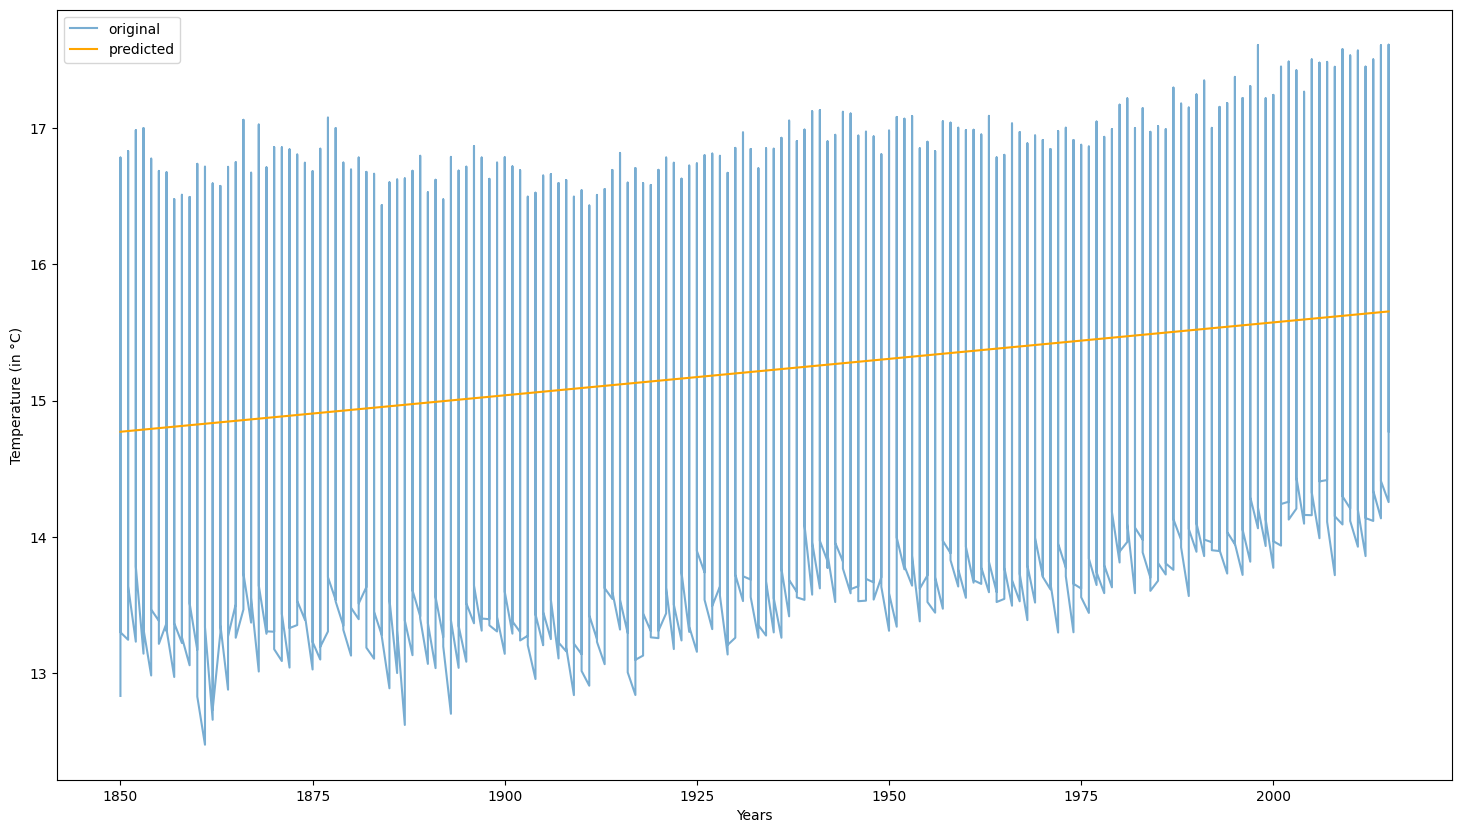

In [474]:
plt.figure(figsize=(18,10))
plt.plot(X, y, alpha=0.6, label='original')
plt.plot(X, y_pred, color="orange", label='predicted')
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')
plt.legend(fontsize='medium')
plt.show()

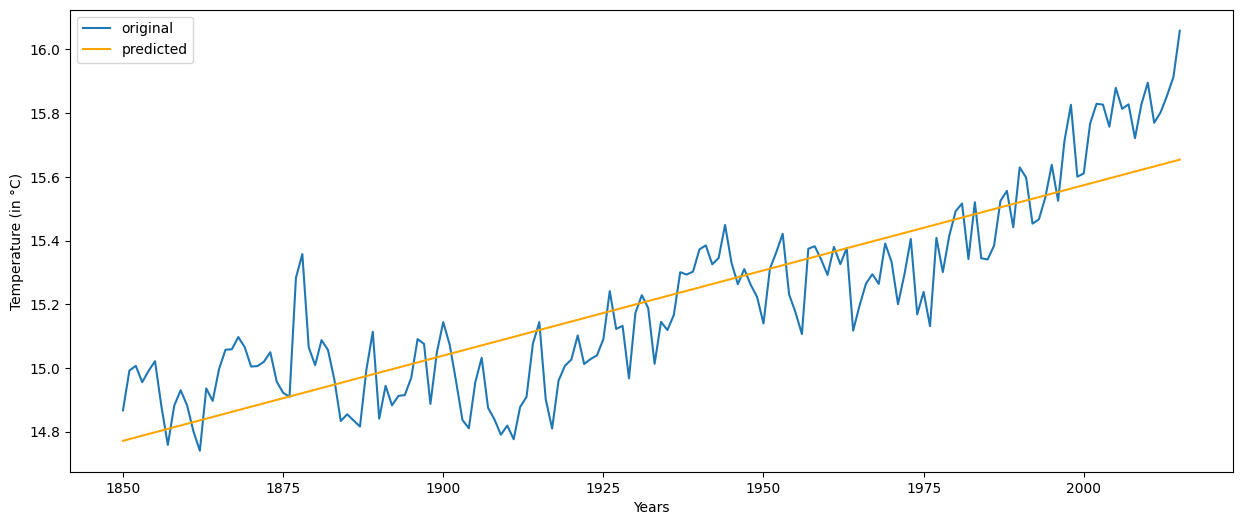

In [475]:
avg_temp = reg_series.groupby(reg_series.index.year).mean()

plt.figure(figsize=(15,6))
plt.plot(avg_temp, label='original')
plt.plot(X, y_pred, color="orange", label='predicted')
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')
plt.legend(fontsize='medium')
plt.show()

In [495]:
print(lr.coef_)
print(10 * lr.coef_)

[0.00535007]
[0.05350072]


In [496]:
print(lr.predict(np.array([2030, 2050]).reshape(-1,1)))

[15.7341978  15.84119924]


In [498]:
y = lr.predict(np.array([2030, 2050]).reshape(-1,1))

In [499]:
y

array([15.7341978 , 15.84119924])

Every year, the average land and ocean temperature increases by an average of 0.0053 °C. Every ten years, the average land and ocean temperature increases by an average of 0.0535 °C. The average land temperature in 2030 will be 15.734 °C and in 2050 15.841 °C.

In [483]:
import joblib
joblib.dump(lr, "linear_regression_model.pkl")

['linear_regression_model.pkl']

In [484]:
LR = joblib.load("linear_regression_model.pkl")

In [485]:
print(LR.predict(np.array([2030, 2050]).reshape(-1,1)))

[15.7341978  15.84119924]


### ARIMA 

In [424]:
earthTemp = df[df['LandAndOceanAverageTemperature'].notnull()]

In [425]:
earthTemp.shape

(1992, 10)

In [426]:
# See new dataframe
earthTemp.head(5)

LandAverageTemperature  LandAverageTemperatureUncertainty  \
dt                                                                      
1850-01-01                   0.749                              1.105   
1850-02-01                   3.071                              1.275   
1850-03-01                   4.954                              0.955   
1850-04-01                   7.217                              0.665   
1850-05-01                  10.004                              0.617   

            LandMaxTemperature  LandMaxTemperatureUncertainty  \
dt                                                              
1850-01-01               8.242                          1.738   
1850-02-01               9.970                          3.007   
1850-03-01              10.347                          2.401   
1850-04-01              12.934                          1.004   
1850-05-01              15.655                          2.406   

            LandMinTemperature  LandMinTemperatureUncertainty  \
dt                                                              
1850-01-01              -3.206                          2.822   
1850-02-01              -2.291                          1.623   
1850-03-01              -1.905                          1.410   
1850-04-01               1.018                          1.329   
1850-05-01               3.811                          1.347   

            LandAndOceanAverageTemperature  \
dt                                           
1850-01-01                          12.833   
1850-02-01                          13.588   
1850-03-01                          14.043   
1850-04-01                          14.667   
1850-05-01                          15.507   

            LandAndOceanAverageTemperatureUncertainty  years  month  
dt                                                                   
1850-01-01                                      0.367   1850      1  
1850-02-01                                      0.414   1850      2  
1850-03-01                                      0.341   1850      3  
1850-04-01                                      0.267   1850      4  
1850-05-01                                      0.249   1850      5

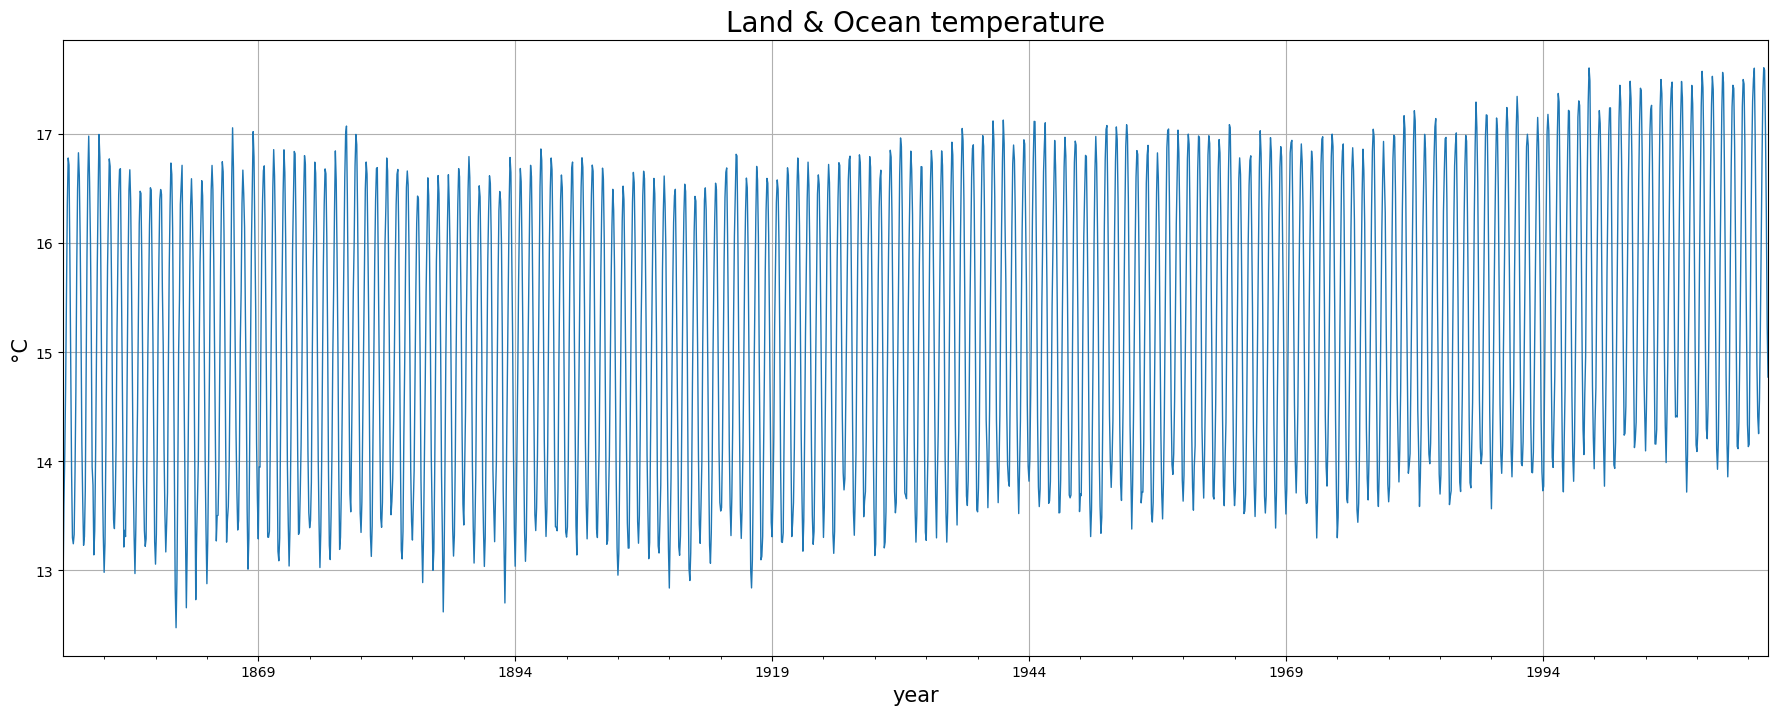

In [427]:
# Get the average temperature for each year and plot the global trend from 1850 year
fig, ax = plt.subplots(figsize=(22,8))
earthTemp["LandAndOceanAverageTemperature"].plot(linewidth=1)
plt.title('Land & Ocean temperature', fontsize=20)
plt.xlabel('year', fontsize=15)
plt.ylabel('°C', fontsize=15)
plt.grid(True)

__The time series seems to shows a trend and periodicity. To better visualize the trend, we calculate the average temperature for each year.__

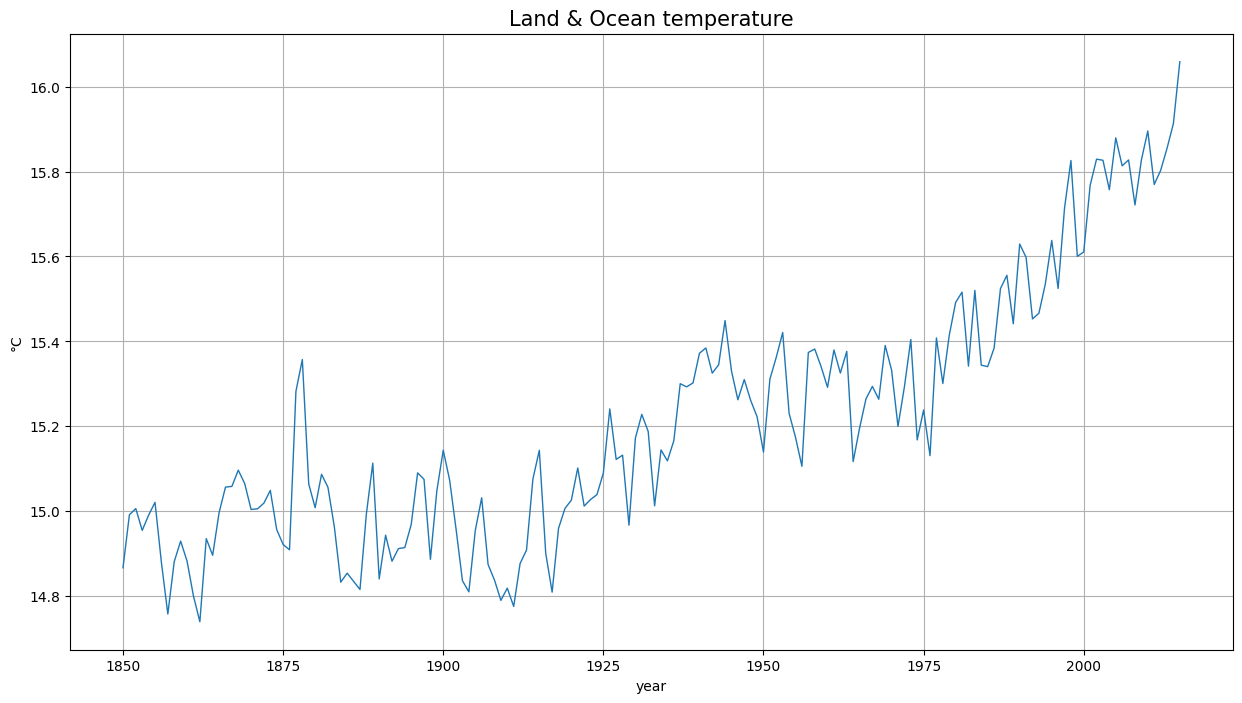

In [428]:
avgTemp = earthTemp.groupby(earthTemp.index.year).mean()
fig, ax = plt.subplots(figsize=(15, 8))
avgTemp["LandAndOceanAverageTemperature"].plot(linewidth=1)
plt.title('Land & Ocean temperature', fontsize=15)
plt.xlabel('year', fontsize=10)
plt.ylabel('°C', fontsize=10)
plt.grid(True)

__We can also calculate the average temperature between 1850-2015 and then calculate the difference with respect this long term average as it is usually done for temperature analysis.__

In [274]:
meanTemp = earthTemp["LandAndOceanAverageTemperature"].mean()
earthTemp["LandAndOceanAverageTemperatureDelta"] = earthTemp["LandAndOceanAverageTemperature"] - meanTemp

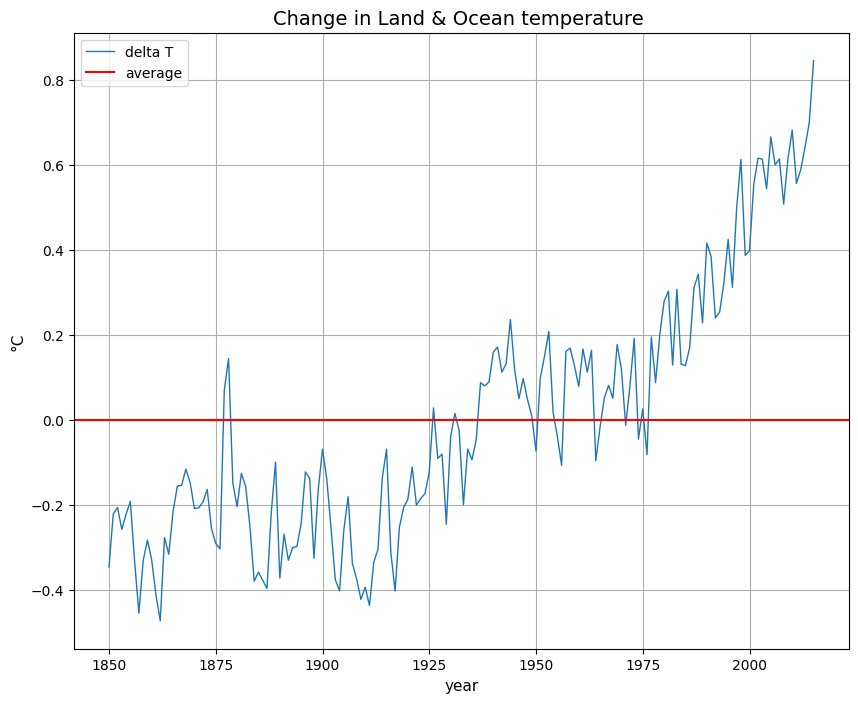

In [280]:
# Plot the difference with respect the mean temperature

avgTemp = earthTemp.groupby(earthTemp.index.year).mean()
fig, ax = plt.subplots(figsize=(10,8))
avgTemp["LandAndOceanAverageTemperatureDelta"].plot(linewidth=1, label ='delta T')
plt.axhline(y=0, color='r', linestyle='-', label = 'average')
plt.title('Change in Land & Ocean temperature ', fontsize=14)
plt.legend(fontsize='medium')
plt.xlabel('year', fontsize=11)
plt.ylabel('°C', fontsize=11)
plt.grid(True)

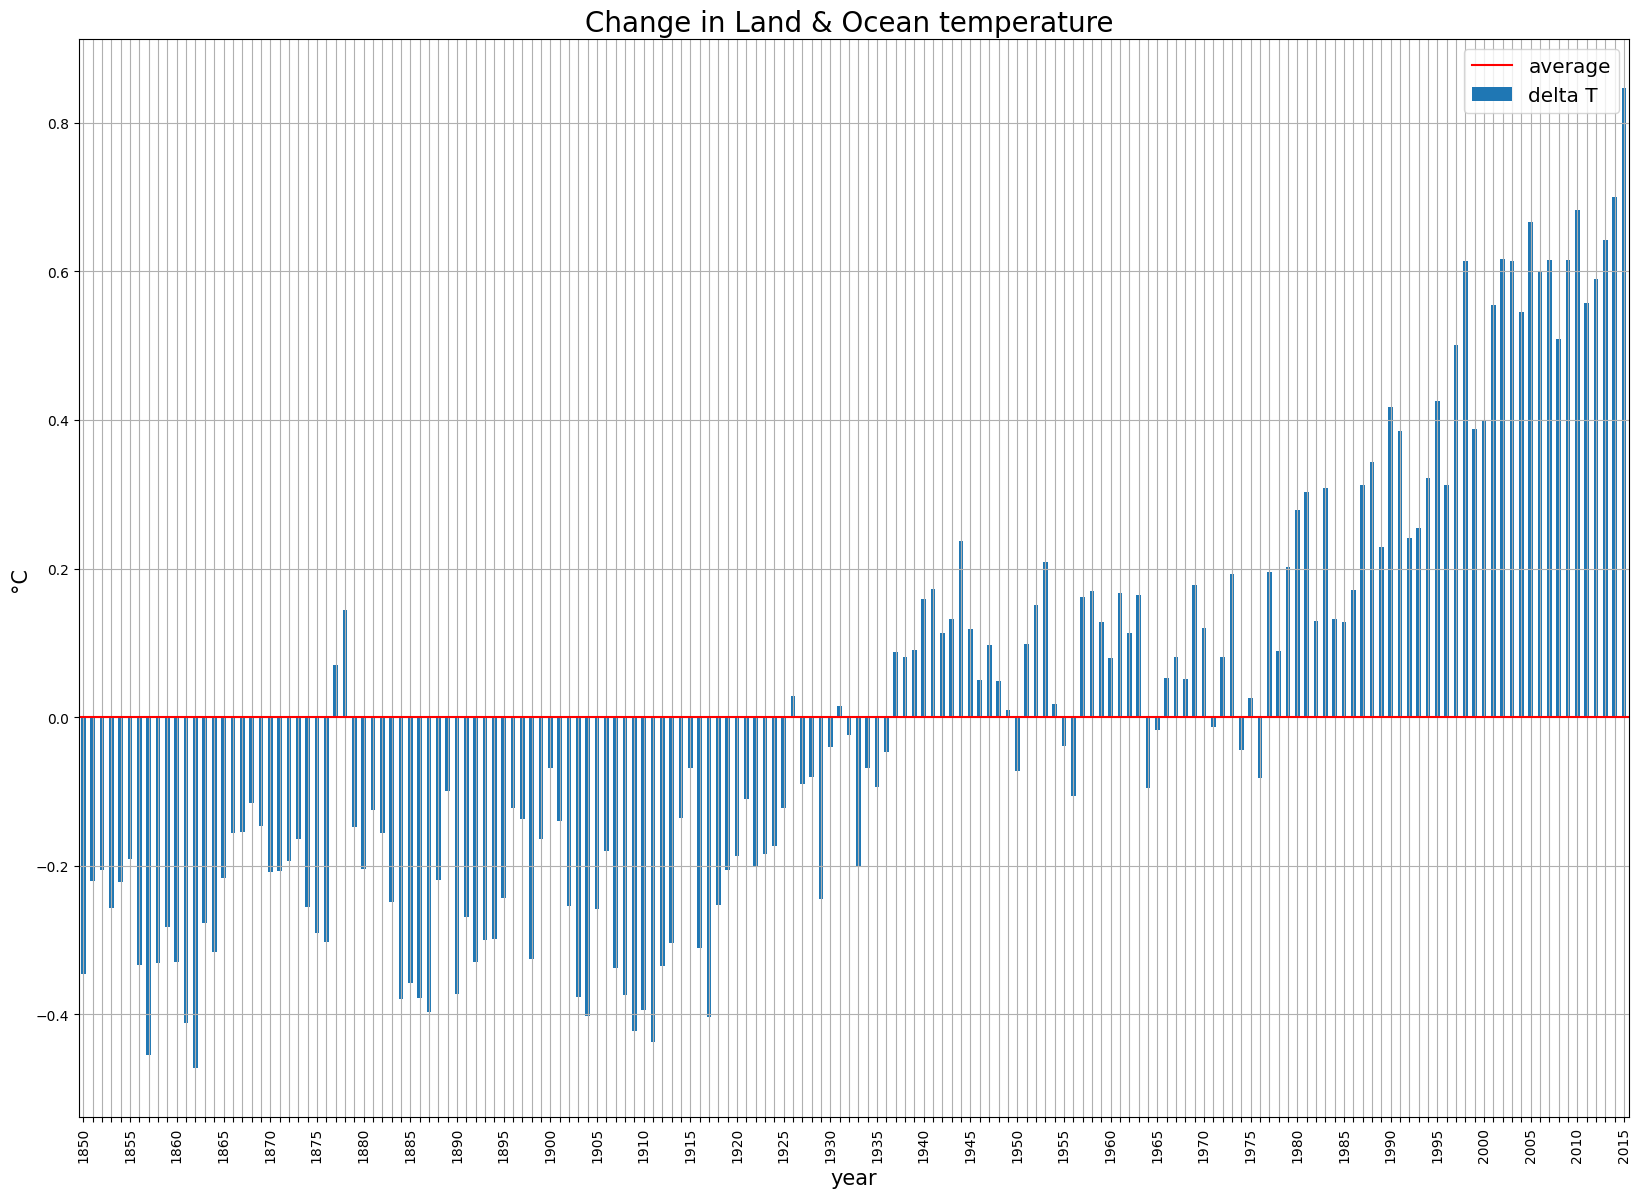

In [281]:
avgTemp = earthTemp.groupby(earthTemp.index.year).mean()
fig_dims = (20, 14)
fig, ax = plt.subplots(figsize=fig_dims)
avgTemp["LandAndOceanAverageTemperatureDelta"].plot.bar(linewidth=1, label ='delta T')
plt.axhline(y=0, color='r', linestyle='-', label = 'average')
plt.title('Change in Land & Ocean temperature ', fontsize=20)
plt.legend(fontsize='x-large')
# Show only some xticks
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 5) != 0:
        t.set_visible(False)
plt.xlabel('year', fontsize=15)
plt.ylabel('°C', fontsize=15)
plt.grid(True)

The non-stationarity of the time series can be seen in a convenient way by decomposing the series into its non-stationary elements as below:

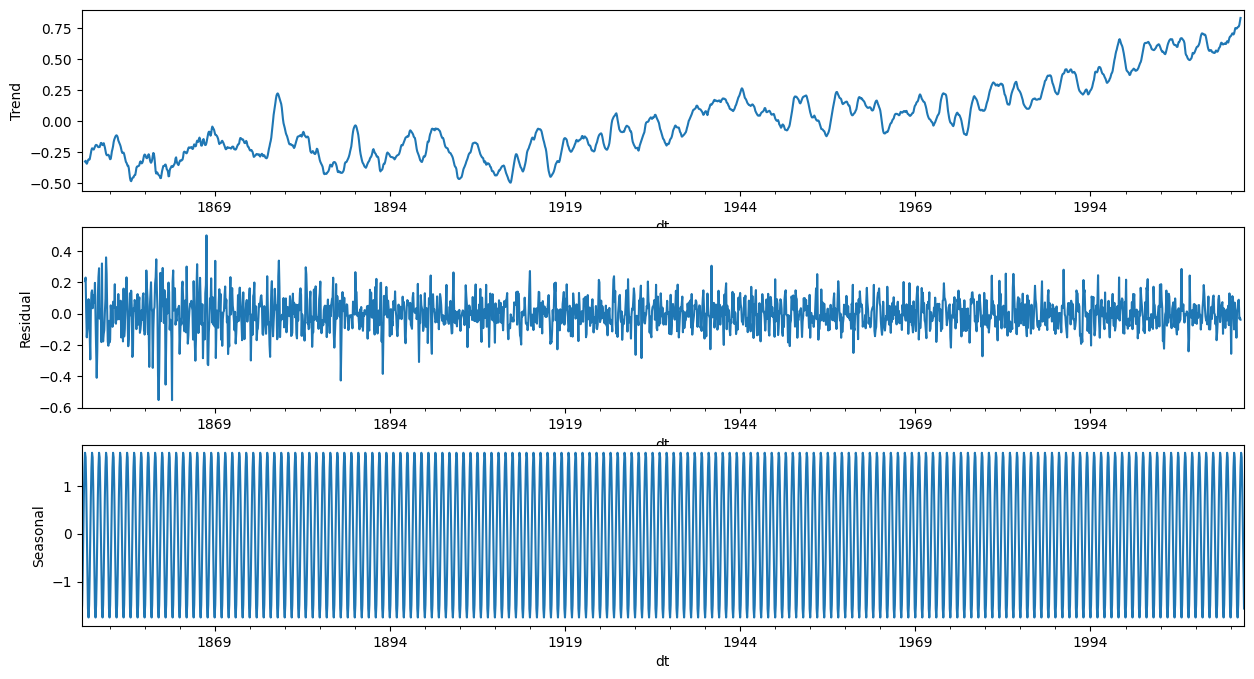

In [282]:
decomposition = seasonal_decompose(earthTemp["LandAndOceanAverageTemperatureDelta"], model='additive')
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
decomposition.trend.plot(ax=ax1)
ax1.set_ylabel('Trend')
decomposition.resid.plot(ax=ax2)
ax2.set_ylabel('Residual')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
plt.show()

In [130]:
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(earthTemp["LandAndOceanAverageTemperatureDelta"])

Results of Dickey-Fuller Test:
Test Statistic                   -1.135299
p-value                           0.700792
#Lags Used                       26.000000
Number of Observations Used    1965.000000
Critical Value (1%)              -3.433682
Critical Value (5%)              -2.863012
Critical Value (10%)             -2.567554
dtype: float64


__The p-value is larger than 5%, which implies that the series is not stationary__

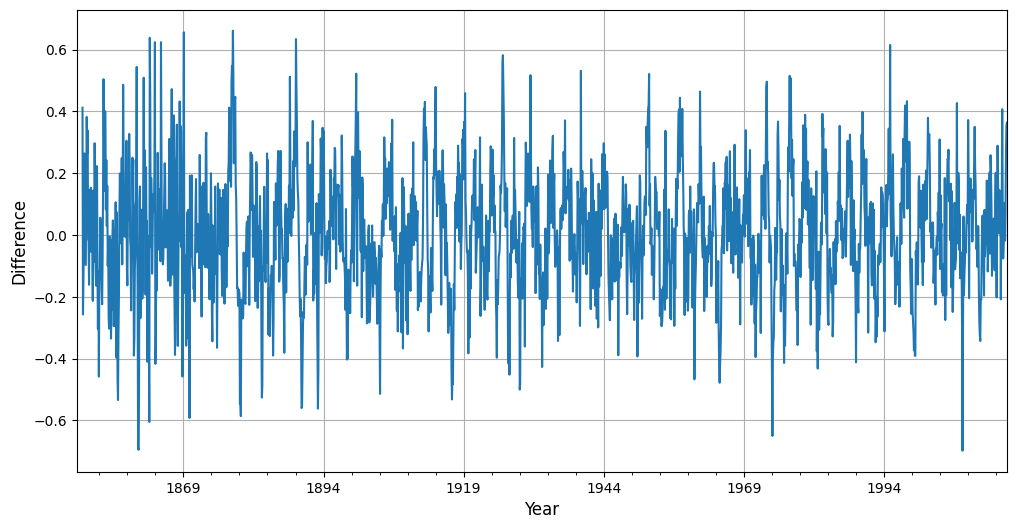

In [283]:
plt.figure(figsize=(12, 6))
# we set 12 that should be the data seasonality because we have monthly data
earthTemp["LandAndOceanAverageTemperature_diff"] = earthTemp["LandAndOceanAverageTemperatureDelta"].diff(12) 
earthTemp["LandAndOceanAverageTemperature_diff"] = earthTemp["LandAndOceanAverageTemperature_diff"].dropna()
earthTemp["LandAndOceanAverageTemperature_diff"].plot()
plt.xlabel('Year', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.grid(True)
plt.show()

In [284]:
earthTemp = earthTemp[earthTemp['LandAndOceanAverageTemperature_diff'].notna()]

In [285]:
adf_test(earthTemp['LandAndOceanAverageTemperature_diff'])

Results of Dickey-Fuller Test:
Test Statistic                -1.198809e+01
p-value                        3.573912e-22
#Lags Used                     2.400000e+01
Number of Observations Used    1.955000e+03
Critical Value (1%)           -3.433699e+00
Critical Value (5%)           -2.863020e+00
Critical Value (10%)          -2.567558e+00
dtype: float64


In [136]:
# Create a separate dataset for our predictions
series = pd.DataFrame(data=earthTemp['LandAndOceanAverageTemperatureDelta'])
series.index = earthTemp.index
series

LandAndOceanAverageTemperatureDelta
dt                                             
1851-01-01                            -1.967566
1851-02-01                            -1.881566
1851-03-01                            -1.315566
1851-04-01                            -0.572566
1851-05-01                             0.558434
...                                         ...
2015-08-01                             2.376434
2015-09-01                             1.836434
2015-10-01                             1.077434
2015-11-01                             0.039434
2015-12-01                            -0.438566

[1980 rows x 1 columns]

The ARIMA model is the combination of these 3 model and it is defined by parameters (d,q,d)
1. __AR__ Autoregression
2. __MR__ Moving average
3. __I__ Integrated

However, the ARIMA model is not able to take care of seasonality. This can be done by the SARIMA model (i.e. Seasonal ARIMA). It adds more 4 more parameters P,D,Q,m:

- __P__ is Seasonal AR term
- __Q__ is seasonal MA term
- __D__ is seasonal difference order
- __m__ is the number of time steps for a single seasonal period



In [239]:
model = auto_arima(
    series['LandAndOceanAverageTemperatureDelta'],  # The time series data
    start_p=1,       # Starting value of the order of autoregressive component
    start_q=1,       # Starting value of the order of moving average component
    max_p=3,         # Maximum value of the order of autoregressive component
    max_q=3,         # Maximum value of the order of moving average component
    start_P=1,       # Starting value of the seasonal order of autoregressive component
    start_Q=1,       # Starting value of the seasonal order of moving average component
    max_P=2,         # Maximum value of the seasonal order of autoregressive component
    max_Q=2,         # Maximum value of the seasonal order of moving average component
    m=12,            # Number of time steps in a seasonal period (seasonal period = m)
    seasonal=True,   # Indicates whether the data has a seasonal pattern
    d=1,             # Degree of differencing for non-seasonal differencing
    D=1,             # Degree of differencing for seasonal differencing
    trend='ct',      # Type of trend component ('c' constant, 't' linear trend)
    test='adf',      # Statistical test for selecting the best differencing terms
    trace=True,      # Print diagnostic information during the fitting process
    error_action='ignore',  # What to do if an error occurs (other options: 'warn', 'raise')
    suppress_warnings=True,  # Suppress warnings
    stepwise=True    # Use stepwise search for order selection
)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=-2297.778, Time=9.18 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-1179.518, Time=0.82 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-1931.524, Time=1.77 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-2342.886, Time=6.56 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-1500.475, Time=2.54 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-2254.227, Time=7.63 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-2362.802, Time=18.05 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-2367.879, Time=19.99 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=-2339.882, Time=22.71 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=-2221.124, Time=19.63 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=-2059.062, Time=22.38 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=-2407.026, Time=25.67 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=-2400.637, Time=25.54 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=-2381.241, Time=29.68 s

In [240]:
print(model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                 1980
Model:             SARIMAX(0, 1, 3)x(1, 1, [1, 2], 12)   Log Likelihood                1226.580
Date:                                 Wed, 23 Aug 2023   AIC                          -2435.160
Time:                                         14:56:17   BIC                          -2384.901
Sample:                                     01-01-1851   HQIC                         -2416.690
                                          - 12-01-2015                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0006      0.001     -0.596      0.551      -0.003       0

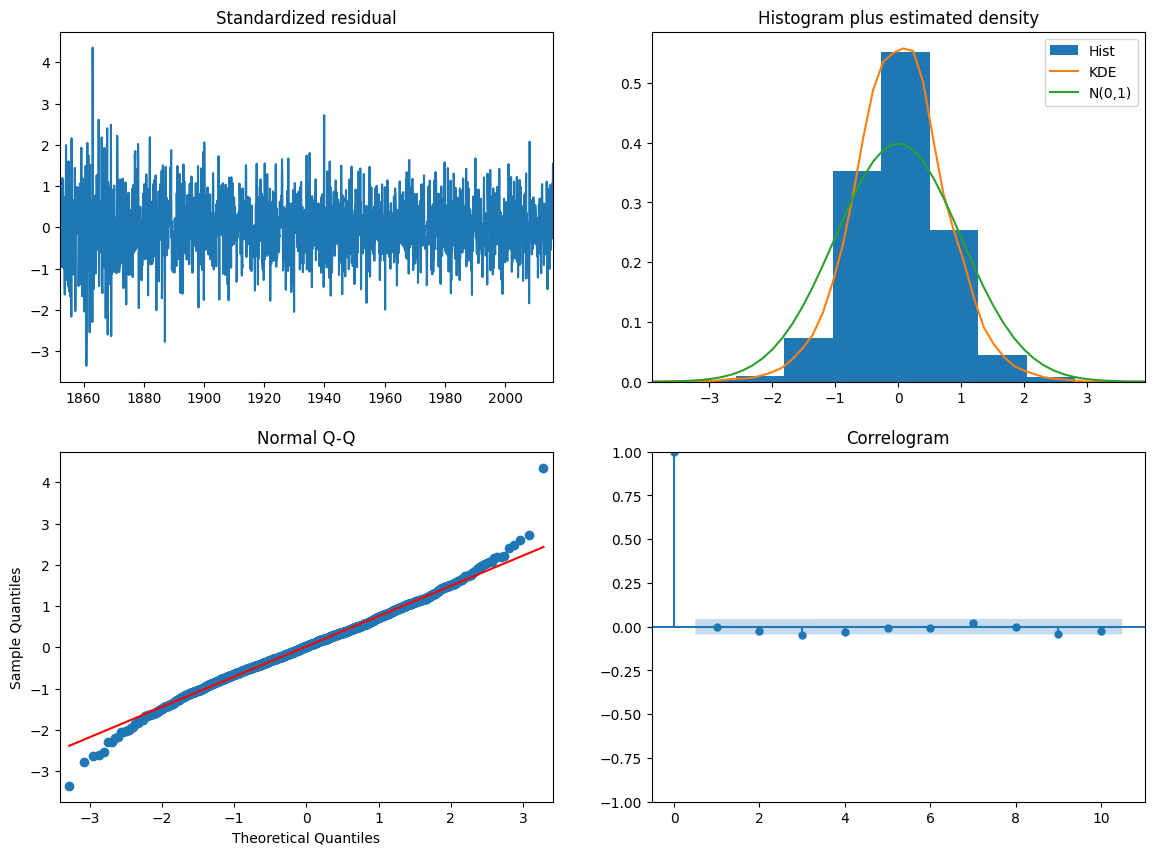

In [241]:
model.plot_diagnostics(figsize=(14,10))
plt.show()

### SARIMAX Model

In [244]:
mod = sm.tsa.SARIMAX(series['LandAndOceanAverageTemperatureDelta'], order=(0, 1, 3), seasonal_order=(1,1,[1, 2],12), trend='ct')
res = mod.fit()

print(res.summary())

                                        SARIMAX Results                                        
Dep. Variable:     LandAndOceanAverageTemperatureDelta   No. Observations:                 1980
Model:             SARIMAX(0, 1, 3)x(1, 1, [1, 2], 12)   Log Likelihood                1226.580
Date:                                 Wed, 23 Aug 2023   AIC                          -2435.160
Time:                                         15:01:57   BIC                          -2384.901
Sample:                                     01-01-1851   HQIC                         -2416.690
                                          - 12-01-2015                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0006      0.001     -0.596      0.551      -0.003       0

### In-sample Predictions

In [245]:
startDate = series.index[0]
endDate = series.index[-1]
predicted = res.predict(start=startDate, end=endDate)
series['LandAndOceanAverageTemperaturePredictions'] = predicted

In [247]:
series.head()

LandAndOceanAverageTemperatureDelta  \
dt                                                
1851-01-01                            -1.967566   
1851-02-01                            -1.881566   
1851-03-01                            -1.315566   
1851-04-01                            -0.572566   
1851-05-01                             0.558434   

            LandAndOceanAverageTemperaturePredictions  
dt                                                     
1851-01-01                                  -0.000400  
1851-02-01                                  -1.967966  
1851-03-01                                  -1.881966  
1851-04-01                                  -1.315965  
1851-05-01                                  -0.572965

In [250]:
print('The mean squared error is:', mean_squared_error(series['LandAndOceanAverageTemperatureDelta'],
                                                       series['LandAndOceanAverageTemperaturePredictions']))

The mean squared error is: 0.01911621586415096


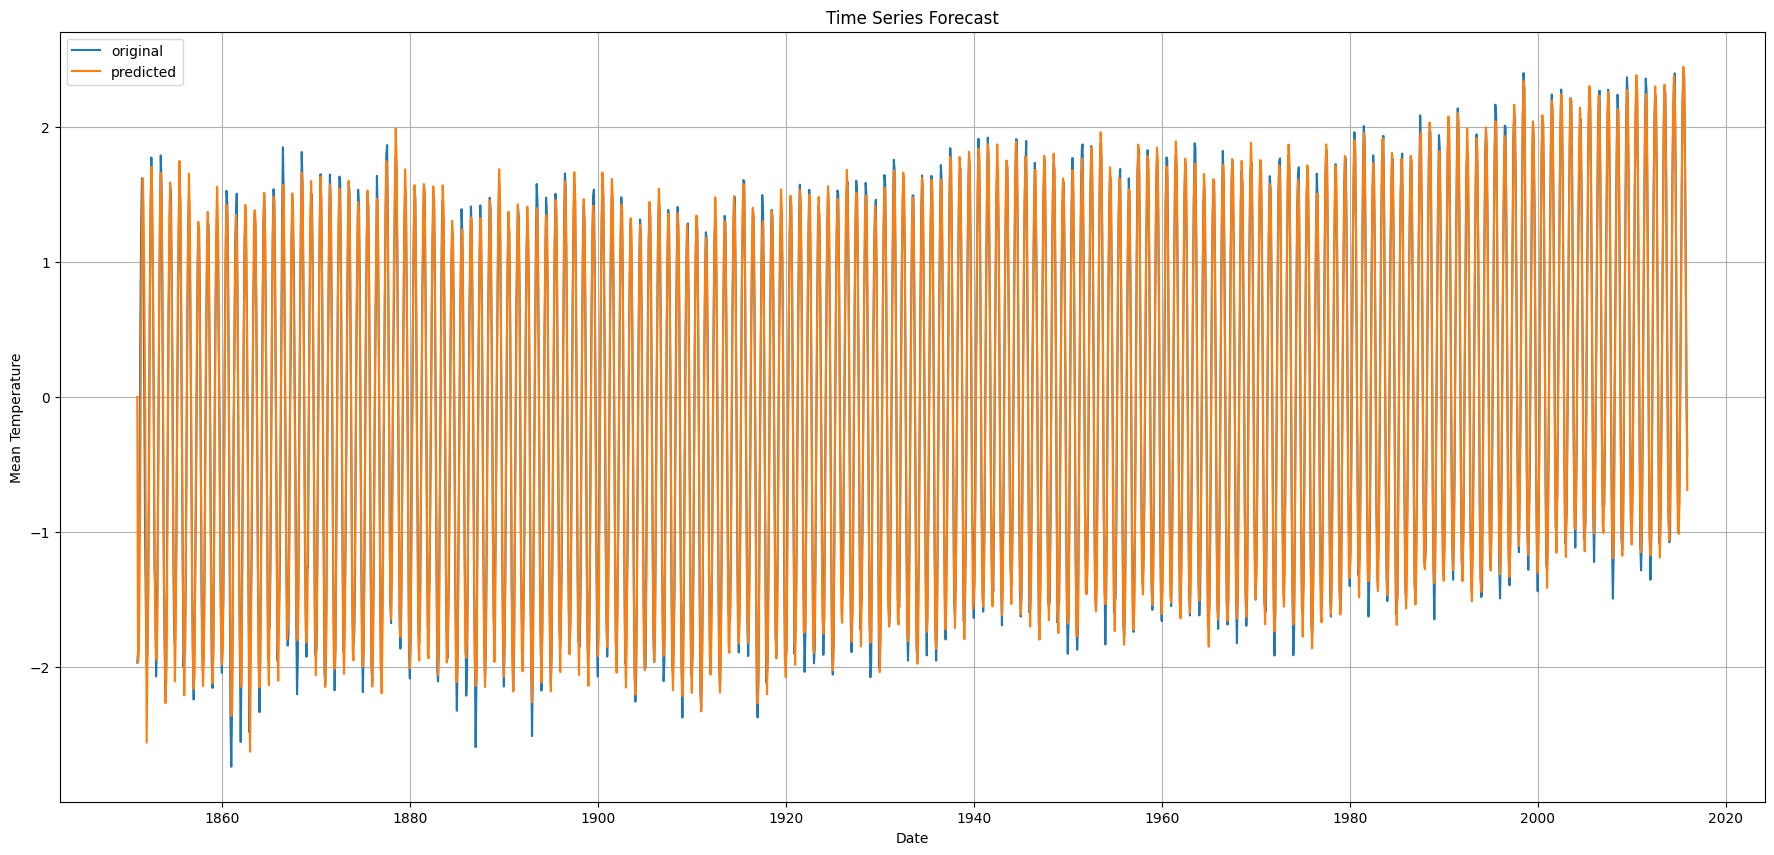

In [295]:
plt.figure(figsize=(22,10))
plt.plot(series.index,series['LandAndOceanAverageTemperatureDelta'], label = "original")
plt.plot(series['LandAndOceanAverageTemperaturePredictions'], label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend(fontsize='medium')
plt.grid(True)
plt.show()

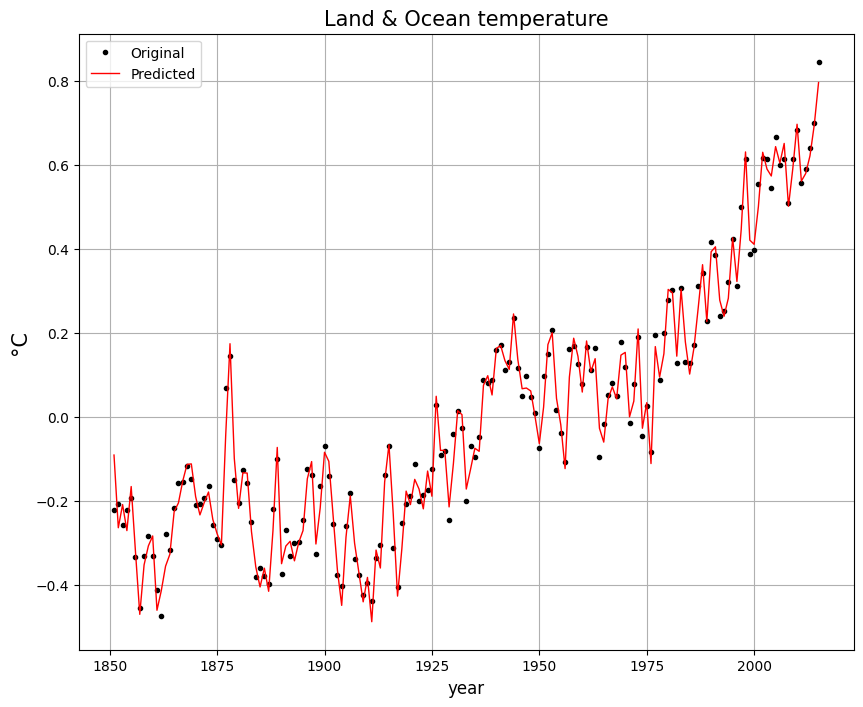

In [301]:
avgTemp = series.groupby(series.index.year).mean()
fig, ax = plt.subplots(figsize=(10,8))
avgTemp["LandAndOceanAverageTemperatureDelta"].plot(marker='.', linestyle="None", color='black', label='Original')
avgTemp["LandAndOceanAverageTemperaturePredictions"].plot(color='red',linewidth=1, label='Predicted')
plt.title('Land & Ocean temperature', fontsize=15)
plt.xlabel('year', fontsize=12)
plt.ylabel('°C', fontsize=15)
plt.legend(fontsize='medium')
plt.grid(True)

### Out-of-sample predictions (Forecast)

In [325]:
# To make predictions in 100 years, we need to multiply the number of sample per year (12) for 100
Step = 12*100
forecast = res.get_forecast(steps=Step)

In [326]:
forecast = forecast.summary_frame()

In [327]:
forecast.head()

LandAndOceanAverageTemperatureDelta      mean   mean_se  mean_ci_lower  \
2016-01-01                          -0.731702  0.162780      -1.050745   
2016-02-01                          -0.530818  0.186150      -0.895665   
2016-03-01                           0.166266  0.200333      -0.226379   
2016-04-01                           1.034038  0.210650       0.621172   
2016-05-01                           1.797149  0.220485       1.365008   

LandAndOceanAverageTemperatureDelta  mean_ci_upper  
2016-01-01                               -0.412659  
2016-02-01                               -0.165971  
2016-03-01                                0.558912  
2016-04-01                                1.446904  
2016-05-01                                2.229291

In [328]:
forecasts = pd.DataFrame(columns = ['LandAndOceanAverageTemperaturePredictions','LandAndOceanAverageTemperaturePredictionsUpper','LandAndOceanAverageTemperaturePredictionsLower'])
forecasts['LandAndOceanAverageTemperaturePredictions'] = forecast['mean']
forecasts['LandAndOceanAverageTemperaturePredictionsUpper'] = forecast['mean_ci_upper']
forecasts['LandAndOceanAverageTemperaturePredictionsLower'] = forecast['mean_ci_lower']
forecasts.index = forecast.index

In [329]:
forecasts.head()

LandAndOceanAverageTemperaturePredictions  \
2016-01-01                                  -0.731702   
2016-02-01                                  -0.530818   
2016-03-01                                   0.166266   
2016-04-01                                   1.034038   
2016-05-01                                   1.797149   

            LandAndOceanAverageTemperaturePredictionsUpper  \
2016-01-01                                       -0.412659   
2016-02-01                                       -0.165971   
2016-03-01                                        0.558912   
2016-04-01                                        1.446904   
2016-05-01                                        2.229291   

            LandAndOceanAverageTemperaturePredictionsLower  
2016-01-01                                       -1.050745  
2016-02-01                                       -0.895665  
2016-03-01                                       -0.226379  
2016-04-01                                        0.621172  
2016-05-01                                        1.365008

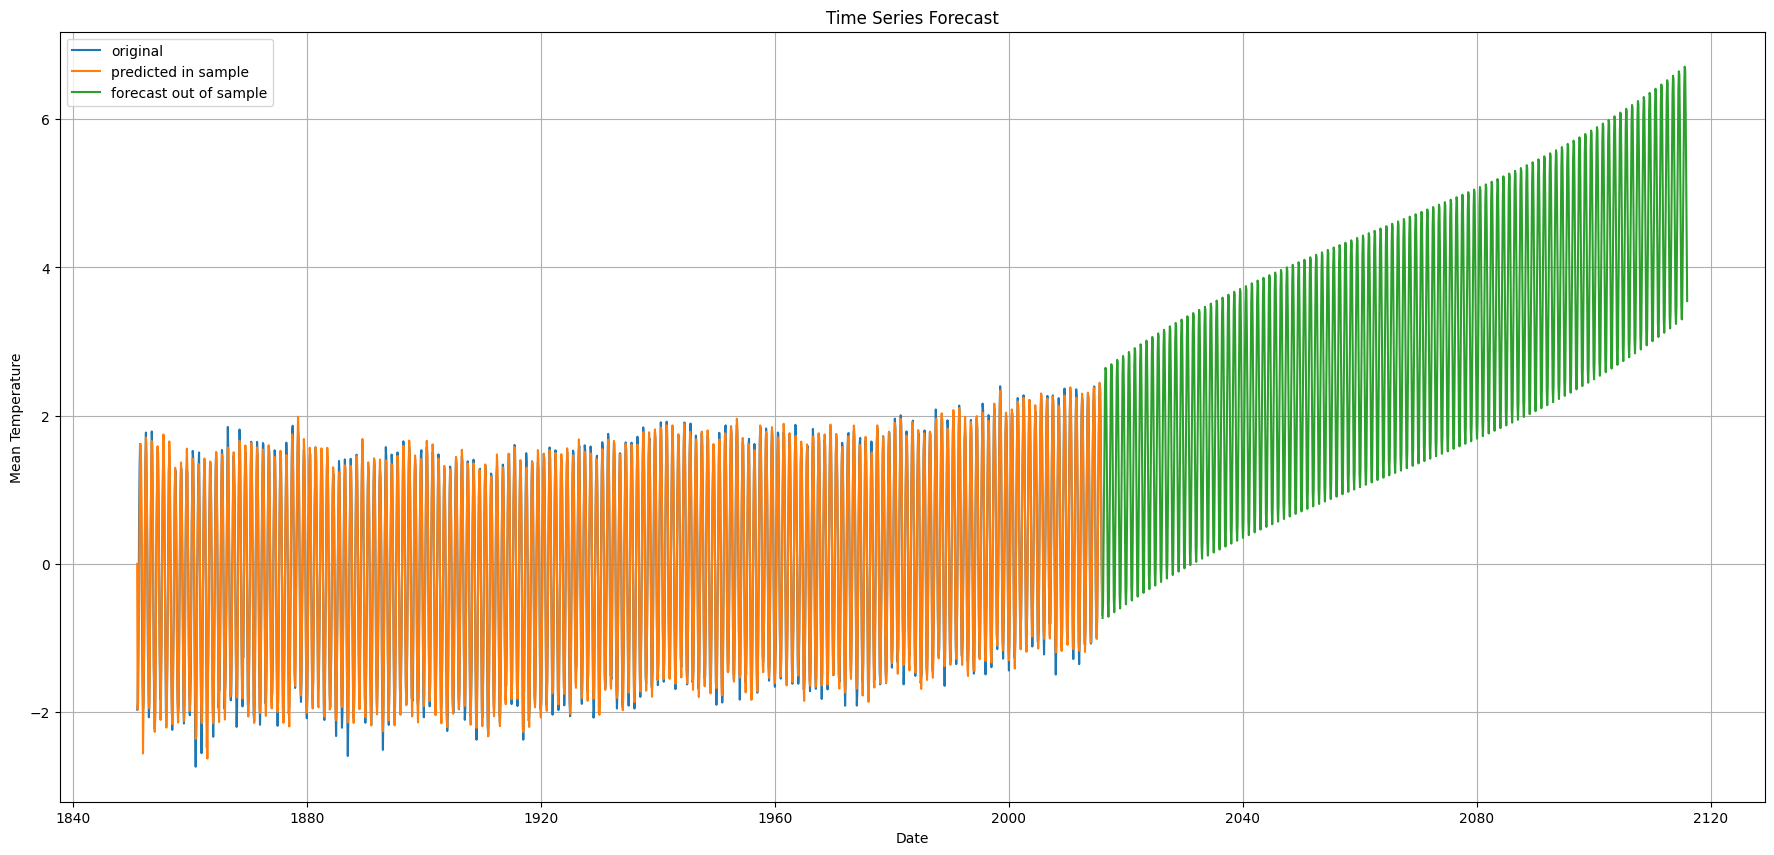

In [330]:
plt.figure(figsize=(22,10))
plt.plot(series.index,series['LandAndOceanAverageTemperatureDelta'],label = "original")
plt.plot(series['LandAndOceanAverageTemperaturePredictions'],label = "predicted in sample")
plt.plot(forecasts['LandAndOceanAverageTemperaturePredictions'],label = "forecast out of sample")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend(fontsize='medium')
plt.grid(True)
plt.show()

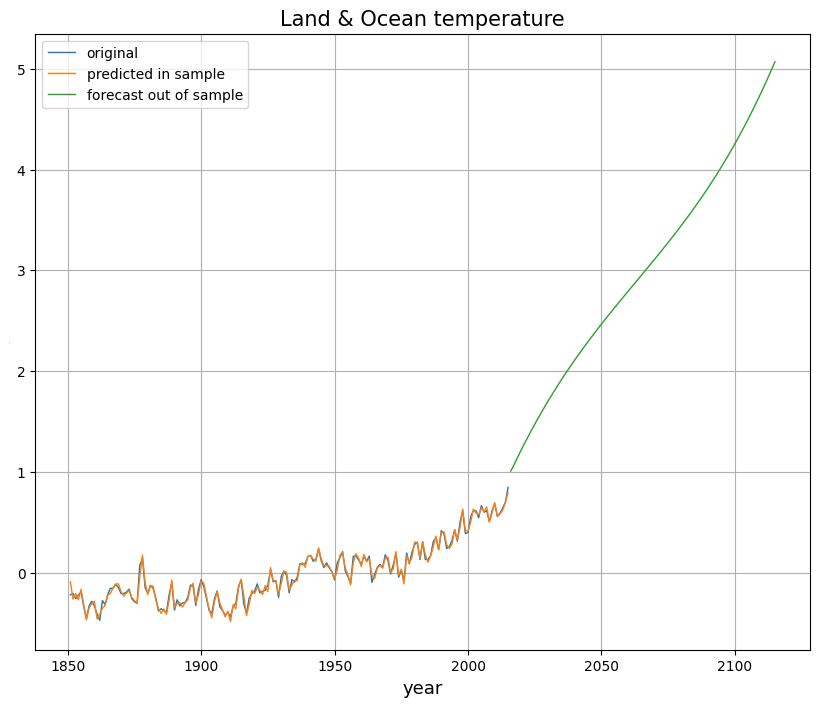

In [331]:
avgTemp = series.groupby(series.index.year).mean()
avgTempPred = forecasts.groupby(forecasts.index.year).mean()
fig, ax = plt.subplots(figsize=(10,8))
avgTemp["LandAndOceanAverageTemperatureDelta"].plot(linewidth=1, label='original')
avgTemp["LandAndOceanAverageTemperaturePredictions"].plot(linewidth=1, label='predicted in sample')
avgTempPred["LandAndOceanAverageTemperaturePredictions"].plot(linewidth=1, label='forecast out of sample')
plt.title('Land & Ocean temperature', fontsize=15)
plt.xlabel('year', fontsize=13)
plt.ylabel('°C', fontsize=1)
plt.legend(fontsize='medium')
plt.grid(True)

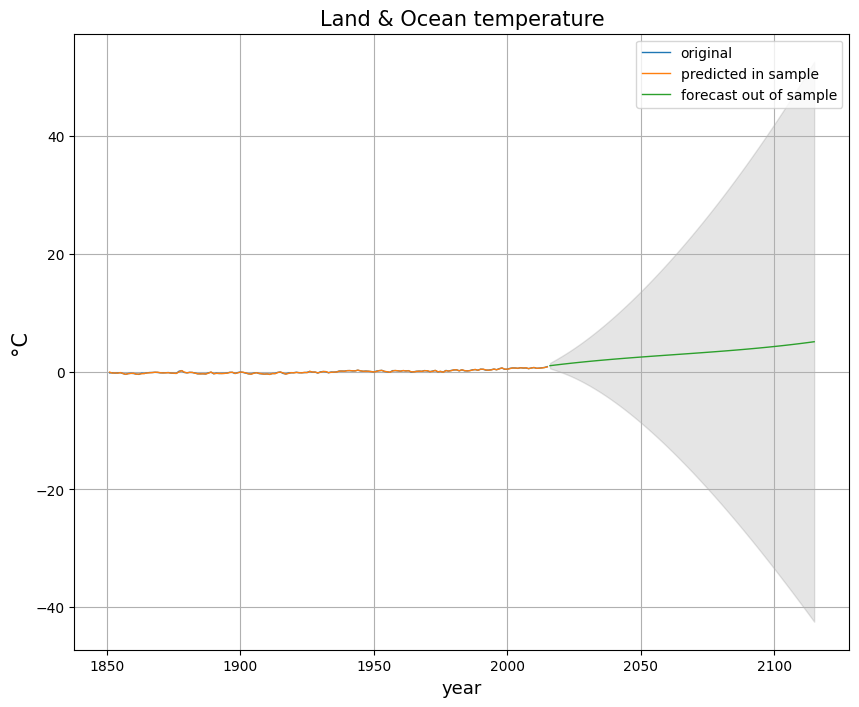

In [332]:
avgTemp = series.groupby(series.index.year).mean()
avgTempPred = forecasts.groupby(forecasts.index.year).mean()
fig, ax = plt.subplots(figsize=(10,8))
avgTemp["LandAndOceanAverageTemperatureDelta"].plot(linewidth=1, label='original')
avgTemp["LandAndOceanAverageTemperaturePredictions"].plot(linewidth=1, label='predicted in sample')
avgTempPred["LandAndOceanAverageTemperaturePredictions"].plot(linewidth=1, label='forecast out of sample')
ax.fill_between(avgTempPred.index, avgTempPred['LandAndOceanAverageTemperaturePredictionsLower'], avgTempPred['LandAndOceanAverageTemperaturePredictionsUpper'], color='k', alpha=0.1);
plt.title('Land & Ocean temperature', fontsize=15)
plt.xlabel('year', fontsize=13)
plt.ylabel('°C', fontsize=15)
plt.legend(fontsize='medium')
plt.grid(True)

In [432]:
joblib.dump(res, "sarimax_model.pkl")

['sarimax_model.pkl']

In [434]:
sarimax_model = joblib.load("sarimax_model.pkl")

In [435]:
print(sarimax_model.summary())

                                        SARIMAX Results                                        
Dep. Variable:     LandAndOceanAverageTemperatureDelta   No. Observations:                 1980
Model:             SARIMAX(0, 1, 3)x(1, 1, [1, 2], 12)   Log Likelihood                1226.580
Date:                                 Wed, 23 Aug 2023   AIC                          -2435.160
Time:                                         17:54:02   BIC                          -2384.901
Sample:                                     01-01-1851   HQIC                         -2416.690
                                          - 12-01-2015                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0006      0.001     -0.596      0.551      -0.003       0